In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

%load_ext line_profiler


#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyDFN3D as dfnpy

work_dir=%pwd
print('Current Workdir=',work_dir)

Current Workdir= F:\PyDFN3D\Examples


In [2]:
Case1=dfnpy.DFN_Model()
#Case1.loadDFN('..\Datas\DFN_400fracs.dat')
Case1.loadDFN('..\Datas\DFN_50fracs.dat')

[Input] Reading "..\Datas\DFN_50fracs.dat" DFN file....
Dimension= 3
Number of Points= 160
Number of Fractures= 15
Number of Intersections= 45
Number of Wells= 2
Fracture 0 has Intersections of  [0, 1, 2]
Fracture 4 has Intersections of  [3, 12, 15, 16, 17, 18]
Fracture 8 has Intersections of  [9, 21, 22, 33, 34, 35, 36]
Fracture 12 has Intersections of  [2, 34]
Fracture 14 has Intersections of  [18, 25, 27, 31, 32, 40, 41, 42, 43, 44]


In [3]:
h_mesh_frac=100.0/5
Case1.setFlowSolver(solver='BEM',h_frac=h_mesh_frac,h_trace=h_mesh_frac)

------------Setting up Fracture 1------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:25(Total) 18(Edge) 7(Trace)
[Mesh] Number of Nodes:75(Total) 54(Edge) 21(Trace) 0(Source)
------------Setting up Fracture 2------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:42(Total) 25(Edge) 16(Trace)
[Mesh] Number of Nodes:124(Total) 75(Edge) 48(Trace) 1(Source)
------------Setting up Fracture 3------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:20(Total) 15(Edge) 4(Trace)
[Mesh] Number of Nodes:58(Total) 45(Edge) 12(Trace) 1(Source)
------------Setting up Fracture 4------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:13(Total) 11(Edge) 1(Trace)
[Mesh] Number of Nodes:37(Total) 33(Edge) 3(Trace) 1(Source)
------------Setting up Fracture 5------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used


------------ Fracture 14------------


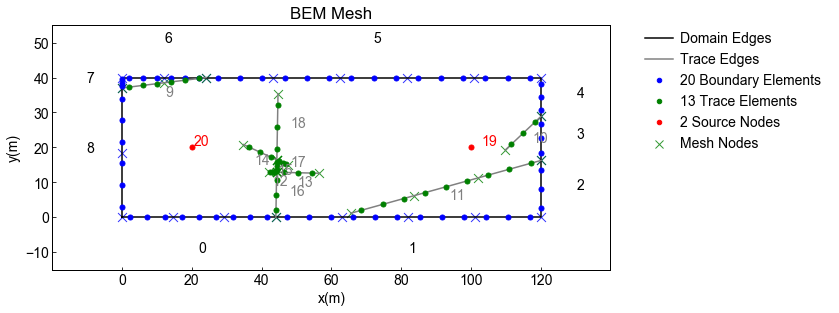

In [4]:
i=14
print('\n------------ Fracture %d------------'%(i))
Case1.FlowSolver.showMesh(i,scale=2.0)

## Set up boundary conditions

In [5]:
#2. Set up boundary condition automatically
def getBCTable(FracBDIDs,BCtype,BCvalue):
    Tables=[]
    for fracBDID in FracBDIDs:
        fracID=fracBDID[0]
        IntIDs=fracBDID[1]
        for idx in IntIDs:
            Tables.append((fracID,idx,BCtype,BCvalue))
    return Tables

#Well1
FracBDIDs=Case1.FracNets.GetWellsIntersectTable(0)
BCtype='Dirichlet'
BCvalue=2e6
#Format (fracID,BdID,BCtype,BCvalue)
Inlets=getBCTable(FracBDIDs,BCtype,BCvalue)

#Well2, Well3
FracBDIDs=Case1.FracNets.GetWellsIntersectTable(1)
BCtype='Dirichlet'
BCvalue=1e6
#Format (fracID,BdID,BCtype,BCvalue)
Outlet1=getBCTable(FracBDIDs,BCtype,BCvalue)

Outlet2=[]
#FracBDIDs=Case1.FracNets.GetWellsIntersectTable(2)
#BCtype='Dirichlet'
#BCvalue=1e6
#Format (fracID,BdID,BCtype,BCvalue)
#Outlet2=getBCTable(FracBDIDs,BCtype,BCvalue)

Outlets=Outlet1+Outlet2

In [6]:
for BC in Inlets+Outlets:
    fracID,BDID,BC_type,BC_val=BC
    if(BC_type=='Dirichlet'):
        Case1.setBoundaryConditions(fracID=fracID,DirichletBC=[(BDID,BC_val)])
    if(BC_type=='Neumann'):
        Case1.setBoundaryConditions(fracID=fracID,NeumannBC=[(BDID,BC_val)])

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(22, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(11, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(6, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(17, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(18, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(9, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(9, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(12, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(19, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(15, 1000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(10, 1000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Diri

## Set up frac props and solve

Frac Aperature Mean Min Max 0.14216352911935587 0.0935404632935454 0.2034911327821348 mm
Frac Permeability Mean Min Max 1.786098605712731e-09 7.291515227642596e-10 3.4507200934130345e-09 m^2


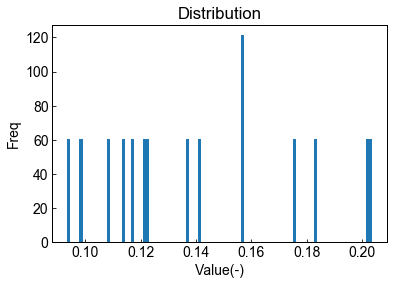

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#Ref1:https://doi.org/10.1007/s12182-016-0132-3
#Ref2:https://doi.org/10.1016/0148-9062(70)90025-2
def getLogNormFracAperature(NumFracs,mu, sigma):
    mm=1e-3 #meter
    d = np.random.lognormal(mu, sigma, NumFracs)
    return d*mm

#Log normal fracture aperature distribution and cubic law permeability calculation
mu, sigma = -2.1, 0.27 # mean and standard deviation from  Ref2

d_frac=getLogNormFracAperature(Case1.FracNets.NumFracs,mu, sigma)
#d_frac=getLogNormFracAperature(1000,mu, sigma)
print('Frac Aperature Mean Min Max',np.mean(d_frac/1e-3),np.min(d_frac/1e-3),np.max(d_frac/1e-3),'mm')

#Cubic law fracture permeability
k_frac=d_frac**2/12
print('Frac Permeability Mean Min Max',np.mean(k_frac),np.min(k_frac),np.max(k_frac),'m^2')

count, bins, ignored = plt.hist(d_frac/1e-3, 100, density=True, align='mid')
plt.title('Distribution')
plt.xlabel('Value(-)')
plt.ylabel('Freq')
plt.show()

#Random distributed prop
#Case1.setFracProperties(perm_array=k_frac,aperature_array=d_frac)

#Uniform distribution
Case1.setFracProperties(perm=3e-10,aperature=0.01)

[Solution] #DOFs= 75
[Solution] #DOFs= 124
[Solution] #DOFs= 58
[Solution] #DOFs= 37
[Solution] #DOFs= 85
[Solution] #DOFs= 81
[Solution] #DOFs= 85
[Solution] #DOFs= 108
[Solution] #DOFs= 88
[Solution] #DOFs= 93
[Solution] #DOFs= 87
[Solution] #DOFs= 65
[Solution] #DOFs= 77
[Solution] #DOFs= 86
[Solution] #DOFs= 101
40	0.04626165146511432		alpha:	131028643.34209402
80	0.004634818249101503		alpha:	65278641.554499045
120	0.0004684032838327554		alpha:	25359638.71776113
160	2.0999521458186486e-05		alpha:	26980248.502175696
Converged at 166 Steps! TOL= 1e-05
Dirichelt [1527596.87909791 1527775.98393217 1530328.30864159]
Neumann [ 8.72085051e-06 -6.77541669e-06 -9.45050572e-05]
[Solution] Total Time= 48.93081212043762 secs
	 Matrix Assembling Time= 0.7623226642608643 secs (1.56%)
	 Matrix solving Time= 47.52651357650757 secs (97.13%), 0.28630429865366 secs/it
	 DDM processing Time = 0.6419758796691895 secs (1.31%)


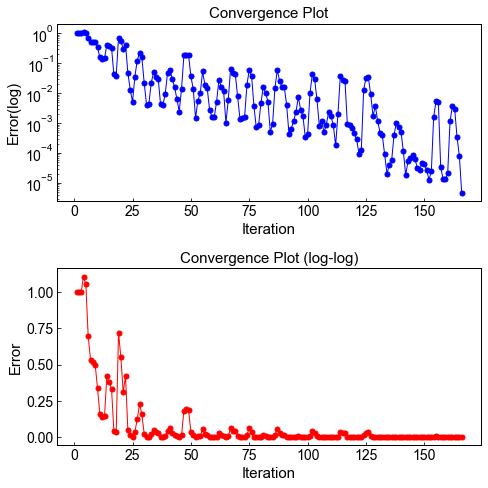

[Solution] CPU Time= 49.55180287361145 secs


In [8]:
Case1.solveFlow(max_iters=2000,tolerance=1e-5)

### Check mass balance error and write Paraview file

In [9]:
Q_in=0.0
Q_out=0.0
for BC in Inlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_in+=Flux
    print('[Inlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))
for BC in Outlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_out+=Flux
    print('[Outlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))

print('[Mass Balance]',abs(Q_in+Q_out))

[Inlet Flux] Frac 1 Boundary ID 22 Flux=2.327226443739553e-05 [m^3]
[Inlet Flux] Frac 2 Boundary ID 11 Flux=3.5306221251299403e-05 [m^3]
[Inlet Flux] Frac 3 Boundary ID 6 Flux=5.132086635889462e-06 [m^3]
[Inlet Flux] Frac 6 Boundary ID 17 Flux=3.413845417209442e-05 [m^3]
[Inlet Flux] Frac 8 Boundary ID 18 Flux=1.101633966669561e-05 [m^3]
[Inlet Flux] Frac 11 Boundary ID 9 Flux=0.00012173249707292387 [m^3]
[Inlet Flux] Frac 12 Boundary ID 9 Flux=2.039498041437643e-05 [m^3]
[Inlet Flux] Frac 13 Boundary ID 12 Flux=0.00013944725220694896 [m^3]
[Inlet Flux] Frac 14 Boundary ID 19 Flux=0.00012686085750217613 [m^3]
[Outlet Flux] Frac 4 Boundary ID 15 Flux=-7.763694942385598e-06 [m^3]
[Outlet Flux] Frac 11 Boundary ID 10 Flux=-0.0001259124772667962 [m^3]
[Outlet Flux] Frac 12 Boundary ID 10 Flux=-1.080211224333116e-05 [m^3]
[Outlet Flux] Frac 13 Boundary ID 13 Flux=-8.215543155959043e-05 [m^3]
[Outlet Flux] Frac 14 Boundary ID 20 Flux=-3.930281146743386e-05 [m^3]
[Mass Balance] 0.000251364425

In [10]:
#Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_4fracs_Well.msh',fname='DFN_4fracs_Well.vtp')
#Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_400fracs.msh',fname='DFN_400fracs.vtp')
Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_50fracs.msh',fname='DFN_50fracs.vtu')
Mesh=Case1.writeDFN(fname='DFN_50fracs.vtp')

Pressure Range= 1000000.0 2000000.0
[Output] Saved VTK mesh and solution file Results\DFN_50fracs_solution.vtu) !
[Output] Saved Geometry VTK file Results\DFN_50fracs_DFN.vtp) !


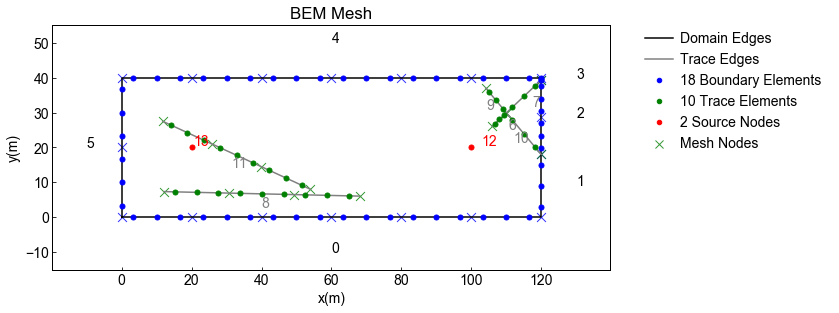

In [14]:
Case1.FlowSolver.showMesh(13,scale=2.0)

In [7]:
xx=Case1.FlowSolver.SubProblems[0].Solve()

[Solution] #DOFs= 51


In [9]:
Case1.FlowSolver.SubProblems[0].get_Solution((4.23257950e+01,-1.77635684e-14))

(42.325795, -1.77635684e-14)
Checking... [0. 0.] [42.32579495  0.        ] 1.1270726555220778e-05 True
Checking... [42.32579495  0.        ] [38.3031806  54.12620744] 1.1270726555220778e-05 True
Checking... [38.3031806  54.12620744] [17.30861752 83.57990299] 1.1270726555220778e-05 False
Checking... [17.30861752 83.57990299] [-7.28787386 88.50487933] 1.1270726555220778e-05 False
Checking... [-7.28787386 88.50487933] [-9.33136561 88.91404942] 1.1270726555220778e-05 False
Checking... [-9.33136561 88.91404942] [-13.29867167  73.67944021] 1.1270726555220778e-05 False
Checking... [-13.29867167  73.67944021] [-23.79321613  33.37998229] 1.1270726555220778e-05 False
Checking... [-23.79321613  33.37998229] [0. 0.] 1.1270726555220778e-05 False
[1, 2]
Pts on the 1 Edge element


(0.0, -0.0, -0.0)

In [9]:
1791.4729203052057-1791.4729182283866

2.076819100693683e-06

In [72]:
Case1.FlowSolver.SubProblems[3].PostProcess.get_BDFlux(2)

(0.0, 0.0)


0.0

In [94]:
Case1.FlowSolver.SubProblems[1].get_Solution((0.5,0.2))

(1117647.0588054599, -3.891909727826714e-13, -0.17647058820819403)

In [95]:
Case1.FlowSolver.SubProblems[3].get_Solution((0.5,0.2))

(1117647.0588054836, 4.2908468458335844e-13, -0.1764705882081352)

In [96]:
-0.17647058820819403+-0.1764705882081352+0.3529411764944523

7.812306357379839e-11

In [82]:
Case1.FracNets.getFracsIntersectTable()

[[0, 1, 5, 5]]

In [83]:
Case1.FracNets.Get3DFracGeo(0)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [84]:
Case1.FracNets.Get3DFracGeo(1)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [69]:
np.dot([1,1,1],[2,2,2])

6